In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime 
import locale
locale.setlocale(locale.LC_ALL, 'ko_KR.UTF-8')

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [21]:
hj = pd.read_excel('급속충전이용내역_환경부_18.01-19.10.xlsx', encoding = "CP949")
hg = pd.read_excel('급속충전이용내역_한전_18.01-19.10.xlsx', encoding = "CP949")

hj2 = hj.copy()
hg2 = hg.copy()

hj2.rename(columns = {
    '충전소명' : '충전소',
    '충전소대분류' : '용도',
    '충전시작시간' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

hg2.rename(columns = {
    '용도별' : '용도',
    '충전소 구축일' : '설치년도',
    '시작일시' : '충전날짜',
    '충전량(kWh)' : '충전량_kWh'
}, inplace = True)

In [22]:
hj2 = hj2.loc[:, ['충전소', '주소', '용도','설치년도', '충전량_kWh', '충전날짜']]
hg2 = hg2.loc[:, ['충전소', '주소', '용도', '설치년도','충전량_kWh', '충전날짜']]

hg2['설치년도'] = list(map(lambda x : x.split('-')[0], hg2['설치년도']))

hj2['충전날짜'] = list(map(lambda x : str(x), hj2['충전날짜'] ))
hj2['충전날짜'] = list(map(lambda x : x[2:10], hj2['충전날짜'] ))

hg2['충전날짜'] = list(map(lambda x : x.split(' ')[0].replace('-', '')[2:] + x.split(' ')[1].replace(':', '')[:2], hg2['충전날짜'] ))

hj2['연도'] = list(map(lambda x : x[:2], hj2['충전날짜']))
hj2['연월'] = list(map(lambda x : x[:4], hj2['충전날짜']))
hj2['연월일'] = list(map(lambda x : x[:6], hj2['충전날짜']))
hj2['월'] = list(map(lambda x : x[2:4], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : x[6:], hj2['충전날짜']))
hj2['시간'] = list(map(lambda x : int(x) , hj2['시간']))

hg2['연도'] = list(map(lambda x : x[:2], hg2['충전날짜']))
hg2['연월'] = list(map(lambda x : x[:4], hg2['충전날짜']))
hg2['연월일'] = list(map(lambda x : x[:6], hg2['충전날짜']))
hg2['월'] = list(map(lambda x : x[2:4], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : x[6:], hg2['충전날짜']))
hg2['시간'] = list(map(lambda x : int(x) , hg2['시간']))

hj3 = hj2.copy()

hj4 = hj3.drop(hj3[hj3['연월'] == '1910'].index, 0)
hj4.index = range(len(hj4))
hj4.shape

(54475, 11)

In [23]:
use_ch = pd.concat([hg2, hj4], axis = 0, ignore_index = True)
print(use_ch.shape)
use_ch.head(5)

(89531, 11)


,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,17.21,18010109,18,1801,180101,01,9
1,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,12.86,18010209,18,1801,180102,01,9
2,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,16.10,18010414,18,1801,180104,01,14
3,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,13.94,18010912,18,1801,180109,01,12
4,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,16.06,18010920,18,1801,180109,01,20


In [24]:
use_ch2 = use_ch.copy()
use_ch2['시간'] = list(map(lambda x : str(x), use_ch2['시간']))
#ch_ym = use_ch2.groupby(['충전소', '연월']).sum()

In [25]:
for i in use_ch2['충전소'].unique()[0] :
    ch_ym = use_ch2[use_ch2['충전소'] == i].groupby(['연월']).sum()
    ch_ym['연월'] = ch_ym.index
    ch_ym.index = range(1, len(ch_ym)+1)
    ch_ym['순서'] = ch_ym.index


In [26]:
'''import statsmodels.api as sm
import statsmodels.formula.api as smf

beta1_li = []

for i in use_ch2['충전소'].unique() :
    ch_ym = use_ch2[use_ch2['충전소'] == i].groupby(['연월']).sum()
    ch_ym['연월'] = ch_ym.index
    ch_ym.index = range(1, len(ch_ym)+1)
    ch_ym['순서'] = ch_ym.index
    
    # 회귀식 
    model = smf.ols(formula = '충전량_kWh ~ 순서', data = ch_ym)
    result = model.fit()
    result.summary()'''

"import statsmodels.api as sm\nimport statsmodels.formula.api as smf\n\nbeta1_li = []\n\nfor i in use_ch2['충전소'].unique() :\n    ch_ym = use_ch2[use_ch2['충전소'] == i].groupby(['연월']).sum()\n    ch_ym['연월'] = ch_ym.index\n    ch_ym.index = range(1, len(ch_ym)+1)\n    ch_ym['순서'] = ch_ym.index\n    \n    # 회귀식 \n    model = smf.ols(formula = '충전량_kWh ~ 순서', data = ch_ym)\n    result = model.fit()\n    result.summary()"

In [30]:
ym_num = []

for i in range(1801, 1910) :
    if ( (i%100 <= 12) & (i%100 > 0) ) :
        ym_num.append(i)
ym_num

[1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909]

In [34]:
ch_ym = use_ch2[use_ch2['충전소'] == use_ch2['충전소'].unique()[10]].groupby(['연월']).sum()
ch_ym['연월'] = ch_ym.index
ch_ym.index = range(1, len(ch_ym)+1)
ch_ym['순서'] = ch_ym.index

ch_ym['연월'] = list(map(lambda x : int(x), ch_ym['연월']))
ch_ym


,충전량_kWh,연월,순서
1,0.21,1808,1
2,14.59,1809,2
3,3.94,1810,3
4,23.79,1904,4
5,38.34,1908,5
6,6.66,1909,6


In [42]:
temp_ym = list( set(ym_num) - set(ch_ym['연월']))
pd.DataFrame([temp_ym, [0] * len(temp_ym)],index = ['연월', '충전량_kWh']).T

,연월,충전량_kWh
0,1801,0
1,1802,0
2,1803,0
3,1804,0
4,1805,0
5,1806,0
6,1807,0
7,1808,0
8,1809,0
9,1810,0


In [52]:
for i in range(1801, 1910) :
    if ( (i%100 <= 12) & (i%100 > 0) ) :
        ym_num.append(i)
ym_num = list(map(lambda x : str(x), ym_num))


ch_ym = use_ch2[use_ch2['충전소'] == use_ch2['충전소'].unique()[10]].groupby(['연월']).sum()
ch_ym['연월'] = ch_ym.index
ch_ym.index = range(1, len(ch_ym)+1)
temp_ym = list( set(ym_num) - set(ch_ym['연월']))
temp_ym_df = pd.DataFrame([temp_ym, [0] * len(temp_ym)],index = ['연월', '충전량_kWh']).T
temp_df = pd.concat([ch_ym, temp_ym_df])
temp_df['연월'] = list(map(lambda x : int(x), temp_df['연월']))
temp_df = temp_df.sort_values(['연월'], ascending = True)
temp_df.index = range(len(temp_df))
temp_df['순서'] = range(1, len(temp_df) +1 )
temp_df

,연월,충전량_kWh,순서
0,1801,0,1
1,1802,0,2
2,1803,0,3
3,1804,0,4
4,1805,0,5
5,1806,0,6
6,1807,0,7
7,1808,0.21,8
8,1809,14.59,9
9,1810,3.94,10


In [56]:
from sklearn.linear_model import LinearRegression

# 충전소 이름 list
ch_name = []
# beta1 값 저장할 list
beta1_li = []
#연월
ym_num = []
for i in range(1801, 1910) :
    if ( (i%100 <= 12) & (i%100 > 0) ) :
        ym_num.append(i)
ym_num = list(map(lambda x : str(x), ym_num))

for i in use_ch2['충전소'].unique() :
    
    # 충전소 이름 저장
    ch_name.append(i)
    
    # 충전소 연월별 충전량 전처리
    ch_ym = use_ch2[use_ch2['충전소'] == i].groupby(['연월']).sum()
    ch_ym['연월'] = ch_ym.index
    ch_ym.index = range(1, len(ch_ym)+1)
    temp_ym = list( set(ym_num) - set(ch_ym['연월']))
    temp_ym_df = pd.DataFrame([temp_ym, [0] * len(temp_ym)],index = ['연월', '충전량_kWh']).T
    temp_df = pd.concat([ch_ym, temp_ym_df])
    temp_df['연월'] = list(map(lambda x : int(x), temp_df['연월']))
    temp_df = temp_df.sort_values(['연월'], ascending = True)
    temp_df.index = range(len(temp_df))
    
    #print(ch_ym)
    #print("전처리 전 ", temp_df, "\n")
    
    for j in range(len(temp_df)) :
        if(temp_df.iloc[j, 1] != 0) :
            start_point = j
            break
            
    ch_ym2 = temp_df.iloc[start_point:, : ]
    ch_ym2['순서'] = range(1, len(ch_ym2) +1 )
    
    #print("전처리 후 ", ch_ym2, "\n")
    model = LinearRegression().fit(pd.DataFrame(ch_ym2['충전량_kWh']), pd.DataFrame(ch_ym2['순서']))
    
    #print("Beta1 값 ", float(model.coef_) , "\n")
    beta1_li.append(float(model.coef_))
    
result = pd.DataFrame( [ch_name, beta1_li], index = ['충전소', 'Beta1']).T
result

,충전소,Beta1
0,강화지사,0.00637067
1,강화군청,0.00710396
2,신문리 공영주차장,0.00358393
3,온수리 제1공영주차장,0.0141114
4,마니산국민관광지,0.0105803
5,초정마을동아 아파트,0.043234
6,계양구청,0.00441788
7,홈플러스 작전점,0.00753529
8,하나로마트 인천점,-0.00127636
9,홈플러스 계산점,0.00905446


In [58]:
result['번호'] = result.index
result

,충전소,Beta1,번호
0,강화지사,0.00637067,0
1,강화군청,0.00710396,1
2,신문리 공영주차장,0.00358393,2
3,온수리 제1공영주차장,0.0141114,3
4,마니산국민관광지,0.0105803,4
5,초정마을동아 아파트,0.043234,5
6,계양구청,0.00441788,6
7,홈플러스 작전점,0.00753529,7
8,하나로마트 인천점,-0.00127636,8
9,홈플러스 계산점,0.00905446,9


In [19]:
#result.sort_values(['Beta1'], ascending = True).iloc[:, :2].to_csv("01.03 Beta1 오름차순 정렬.csv", encoding = "CP949", index = False)

In [16]:
#result.sort_values(['Beta1'], ascending = False).iloc[:, :2].to_csv("01.03 Beta1 내림차순 정렬.csv", encoding = "CP949", index = False)

In [11]:
#res_info = pd.read_csv("12.30 충전소명 및 군구.CSV", encoding = "CP949")

In [56]:
#result.to_csv("12.30 충전소별 B1_2.csv", encoding = "CP949", index = False)

In [65]:
result.iloc[list(result['Beta1']).index(result['Beta1'].min()), 0]

'갈산이안 아파트'

In [66]:
use_ch2[use_ch2['충전소'] == result.iloc[list(result['Beta1']).index(result['Beta1'].min()), 0]].groupby(['연월']).sum()

,충전량_kWh
연월,
1808,0.54


In [67]:
use_ch2[use_ch2['충전소'] == '갈산이안 아파트']

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
18821,갈산이안 아파트,"인천광역시 부평구 평천로305번길 15 (갈산동, 갈산이안아파트)",아파트용,2017,0.54,18082116,18,1808,180821,08,16


In [68]:
use_ch[use_ch['충전소'] == '갈산이안 아파트']

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
18821,갈산이안 아파트,"인천광역시 부평구 평천로305번길 15 (갈산동, 갈산이안아파트)",아파트용,2017,0.54,18082116,18,1808,180821,08,16


In [69]:
ttt = pd.concat([hg2, hj3], axis = 0, ignore_index = True)
ttt.head(1)

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
0,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",공용,2017,17.21,18010109,18,1801,180101,01,9


In [70]:
ttt[ttt['충전소'] == '갈산이안 아파트']

,충전소,주소,용도,설치년도,충전량_kWh,충전날짜,연도,연월,연월일,월,시간
18821,갈산이안 아파트,"인천광역시 부평구 평천로305번길 15 (갈산동, 갈산이안아파트)",아파트용,2017,0.54,18082116,18,1808,180821,08,16


In [59]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [60]:
result2 = result[result['Beta1'] >= 0 ]
result3 = result[result['Beta1'] < 0 ]

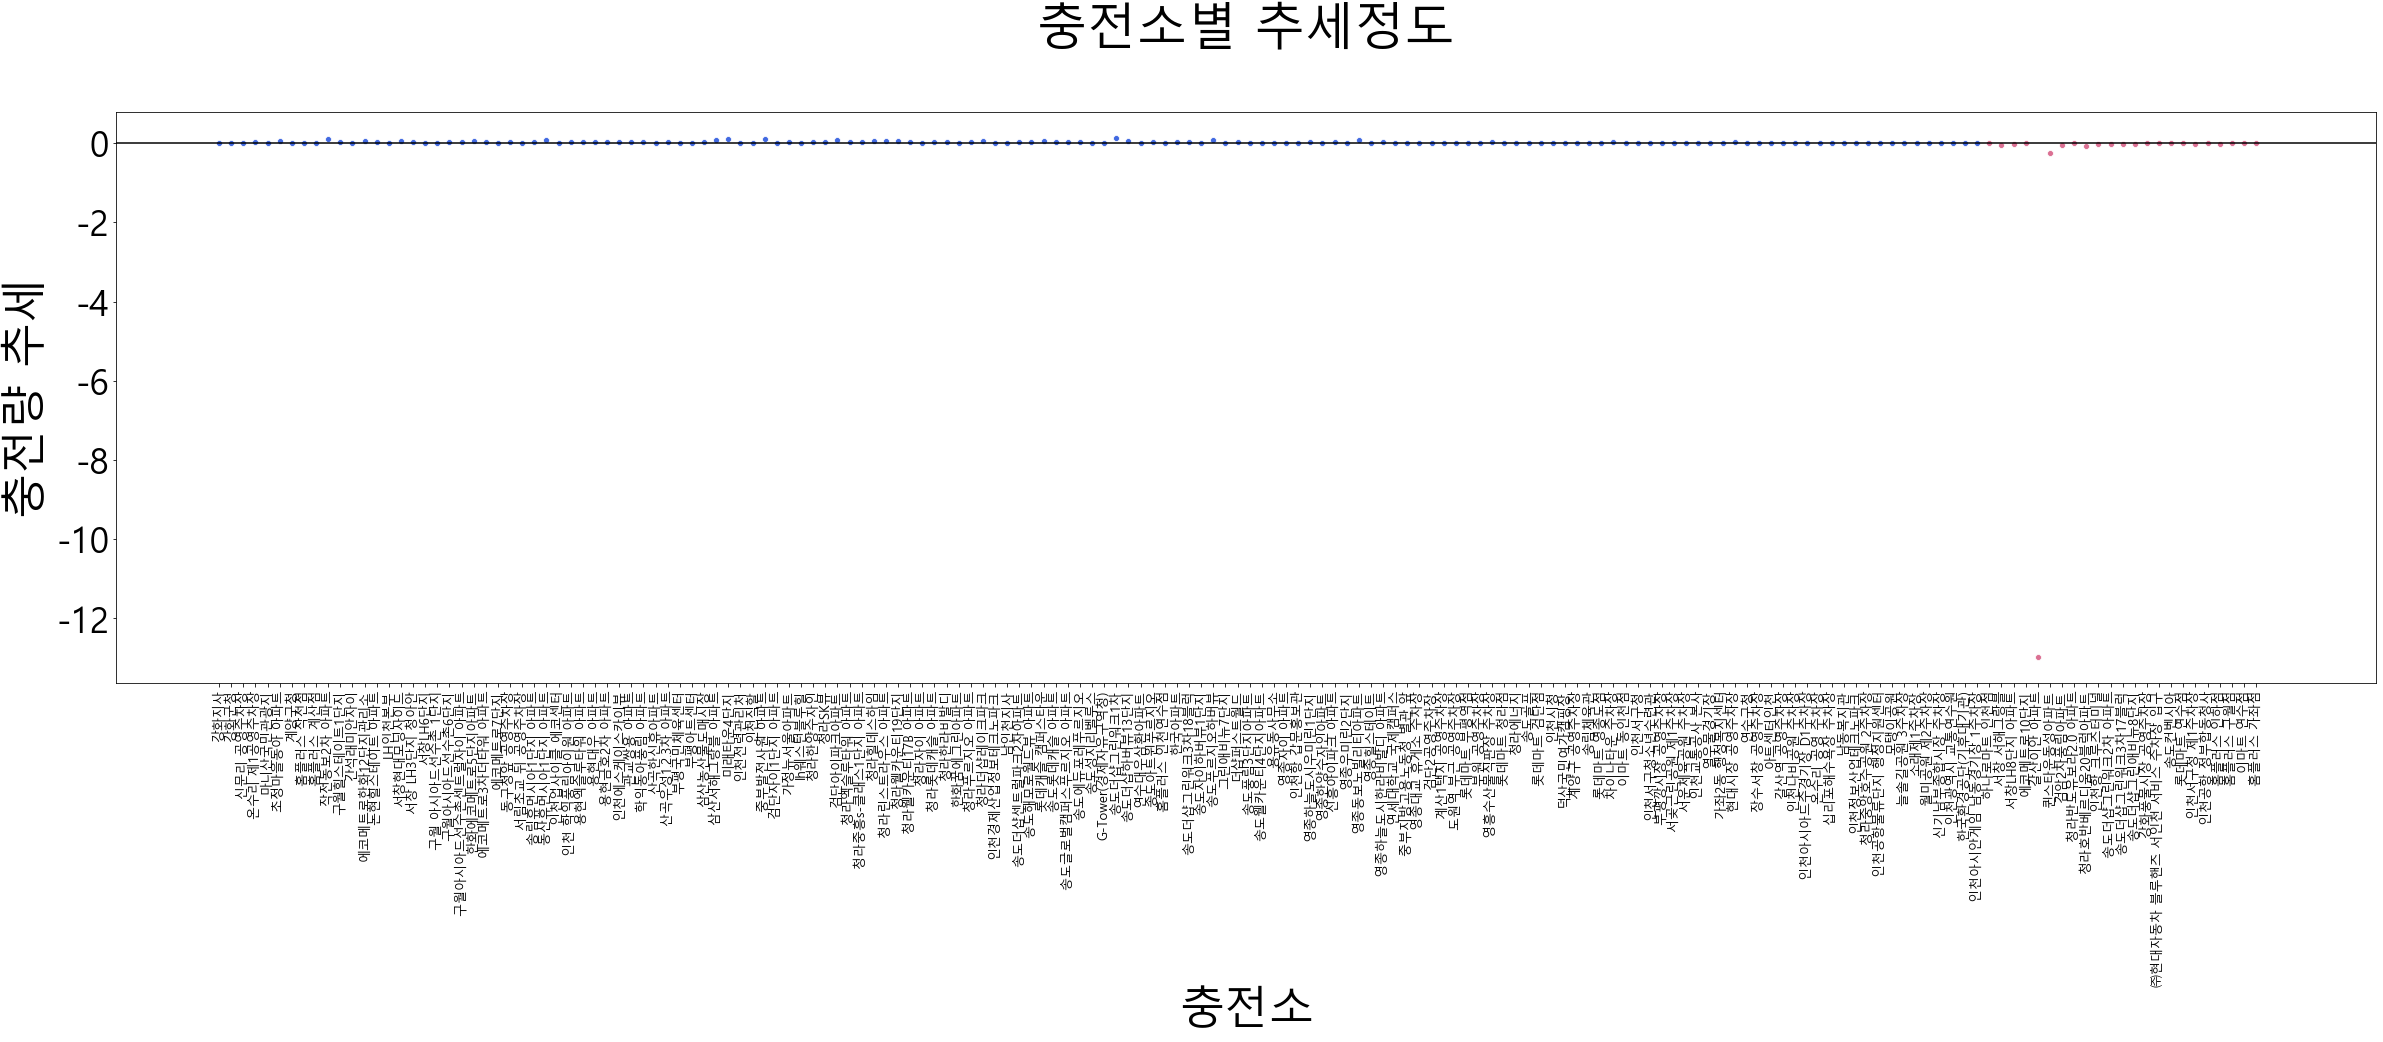

In [61]:
sns.scatterplot(x = '충전소', y = 'Beta1', data = result2, color = 'RoyalBlue')

sns.scatterplot(x = '충전소', y = 'Beta1', data = result3, color = 'PaleVioletRed')

plt.title("충전소별 추세정도\n", fontsize = 50 )

plt.axhline(y=0, color = 'k')

plt.xlabel('충전소', fontsize = 45)
plt.ylabel('충전량 추세', fontsize = 45)

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 35)

fig = plt.gcf()
fig.set_size_inches(40.5, 10.5)
plt.show()

#fig.savefig( r"C:\Users\USER\Desktop\전기차\12.30 결과보고서 시각화\12.30 충전소별 충전량 추세.jpg",     
#       bbox_inches='tight', dpi= 'figure' ,progressive = True)